In [12]:
#Part g) Fine-Tuning

import os
import tarfile
import urllib

import pandas as pd
from sklearn.metrics import mean_squared_error as mse

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import metrics
from sklearn.model_selection import train_test_split


#reading ARP MitM dataset
PATH = "arp_mitm"

FILE = "ARP MitM_dataset-002.csv"
L_FILE = "ARP MitM_labels.csv"

#input data -> measured
csv_path = os.path.join(PATH, FILE)
dataset_filt = pd.read_csv(csv_path, header=None)  

dataset = dataset.dropna()
display(dataset.head())
display(dataset.info())
display(dataset.describe())

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
147800,389.107075,1328.588338,203321.810487,659.807248,1331.225469,198082.369977,1975.608965,1336.764711,188105.314262,19528.642003,...,181681.587706,0.0,0.0,10976.010038,1341.272343,425.270983,1341.272343,180855.408739,0.0,0.0
147801,389.904893,1328.974103,202858.220084,660.601523,1331.449166,197815.525126,1976.403615,1336.836678,188020.369734,19529.439007,...,181623.393691,0.0,0.0,10976.998628,1341.284890,425.253643,1341.284890,180840.660789,0.0,0.0
147848,411.707542,1340.047469,192551.956142,682.376284,1338.031413,191872.459530,1998.613745,1338.980954,186186.345451,19552.109484,...,181840.548054,0.0,0.0,10975.256384,1341.282166,425.260894,1341.282166,180846.828216,0.0,0.0
147849,412.453496,1340.469220,192158.297610,683.123616,1338.289007,191636.846471,1999.367035,1339.068491,186108.535826,19552.868117,...,181786.094436,0.0,0.0,10976.242835,1341.297902,425.244717,1341.297902,180833.069583,0.0,0.0
147850,413.280402,1340.889106,191766.025854,683.951589,1338.545912,191401.730950,2000.199191,1339.155948,186030.782169,19553.703968,...,181731.671686,0.0,0.0,10977.233621,1341.313634,425.228542,1341.313634,180819.312951,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426051 entries, 147800 to 2504266
Columns: 115 entries, 0 to 114
dtypes: float64(115)
memory usage: 1.2 GB


None

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
count,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,...,1.426051e+06,1426051.0,1426051.0,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,1.426051e+06,1426051.0,1426051.0
mean,3.467659e+02,1.328155e+03,1.748683e+05,5.733544e+02,1.328794e+03,1.741698e+05,1.707604e+03,1.329409e+03,1.734572e+05,1.697010e+04,...,1.814257e+05,0.0,0.0,2.575474e+04,1.339698e+03,4.257052e+02,1.339698e+03,1.812252e+05,0.0,0.0
std,1.017266e+02,2.407947e+01,2.161100e+04,1.598407e+02,2.136336e+01,1.962179e+04,4.634193e+02,1.904327e+01,1.807508e+04,4.525437e+03,...,1.514618e+03,0.0,0.0,3.745847e+03,2.446375e+00,5.635775e-01,2.446375e+00,4.799135e+02,0.0,0.0
min,9.909958e+01,1.222004e+03,1.183106e+05,1.172497e+02,1.249450e+03,1.224173e+05,3.590685e+02,1.275819e+03,1.253496e+05,8.619792e+03,...,1.743254e+05,0.0,0.0,1.097520e+04,1.334193e+03,4.243112e+02,1.334193e+03,1.800400e+05,0.0,0.0
25%,3.254215e+02,1.315044e+03,1.611436e+05,5.785401e+02,1.320681e+03,1.651656e+05,1.862915e+03,1.330405e+03,1.730794e+05,1.768808e+04,...,1.804088e+05,0.0,0.0,2.510052e+04,1.340377e+03,4.253046e+02,1.340377e+03,1.808840e+05,0.0,0.0
50%,3.713649e+02,1.332647e+03,1.782212e+05,6.308010e+02,1.335136e+03,1.792030e+05,1.938811e+03,1.337649e+03,1.807284e+05,1.958404e+04,...,1.815120e+05,0.0,0.0,2.783620e+04,1.340896e+03,4.256688e+02,1.340896e+03,1.811939e+05,0.0,0.0
75%,4.109531e+02,1.344437e+03,1.902753e+05,6.741576e+02,1.343429e+03,1.878716e+05,1.983475e+03,1.341696e+03,1.851734e+05,1.965642e+04,...,1.824386e+05,0.0,0.0,2.802440e+04,1.341210e+03,4.260853e+02,1.341210e+03,1.815487e+05,0.0,0.0
max,5.365877e+02,1.386726e+03,2.497739e+05,8.073135e+02,1.383054e+03,2.470734e+05,2.124893e+03,1.356425e+03,2.176417e+05,1.983936e+04,...,1.869187e+05,0.0,0.0,2.821323e+04,1.341961e+03,4.276446e+02,1.341961e+03,1.828799e+05,0.0,0.0


In [6]:
#Reading output data is the observation of malicous and none malicous 
csv_path_L = os.path.join(PATH, L_FILE)

dataset_L_filt = pd.read_csv(csv_path_L, dtype={"": int, "x": 'float64'})  

display(dataset_L.head())
display(dataset_L.info())
display(dataset_L.describe())


,Unnamed: 0,x
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   x           float64
dtypes: float64(1), int64(1)
memory usage: 38.2 MB


None

,Unnamed: 0,x
count,2.504267e+06,2.504267e+06
mean,1.252134e+06,4.573282e-01
std,7.229198e+05,4.981759e-01
min,1.000000e+00,0.000000e+00
25%,6.260675e+05,0.000000e+00
50%,1.252134e+06,0.000000e+00
75%,1.878200e+06,1.000000e+00
max,2.504267e+06,1.000000e+00


In [37]:
import numpy as np
import matplotlib as plt
import scipy.stats

dataset = None
dataset_L = None

#extracing all rows that have values that abide by Zscore < 2 standard deviations from the mean

z_score = np.abs(zscore(dataset_filt))
dataset = dataset_filt[(z_score < 2).all(axis=1)]
dataset_L = dataset_L_filt[(z_score < 2).all(axis=1)]

print("original dataset:")
display(dataset.info())
display(dataset_L.info())
print("new with IQR outlier filtering:")
display(dataset_filt.info())
display(dataset_L_filt.info())

original dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426051 entries, 147800 to 2504266
Columns: 115 entries, 0 to 114
dtypes: float64(115)
memory usage: 1.2 GB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426051 entries, 147800 to 2504266
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1426051 non-null  int64  
 1   x           1426051 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 32.6 MB


None

new with IQR outlier filtering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Columns: 115 entries, 0 to 114
dtypes: float64(115)
memory usage: 2.1 GB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   x           float64
dtypes: float64(1), int64(1)
memory usage: 38.2 MB


None

In [38]:
# part h) accuracy scores

# QDA modeling to see if non-linear model would fix better

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#splitting ratio is 85:15 for training and testing
x_train, x_test, y_train, y_test = train_test_split( dataset, dataset_L, test_size=0.15, random_state=4)


qda = QuadraticDiscriminantAnalysis()
qda_training = qda.fit(x_train,(y_train['x']==1)).predict(x_train)
qda_testing = qda.fit(x_test,(y_test['x']==1)).predict(x_test)


print("\nTRAINING DATA:")
print(classification_report((y_train['x']==1), qda_training, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score((y_train['x']==1), qda_training))

print("\nTEST DATA:")
print(classification_report((y_test['x']==1), qda_testing, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score((y_test['x']==1), qda_testing))


TRAINING DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00    569098
    malicous       1.00      1.00      1.00    643045

    accuracy                           1.00   1212143
   macro avg       1.00      1.00      1.00   1212143
weighted avg       1.00      1.00      1.00   1212143

0.9983896289464197

TEST DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00    100215
    malicous       1.00      1.00      1.00    113693

    accuracy                           1.00    213908
   macro avg       1.00      1.00      1.00    213908
weighted avg       1.00      1.00      1.00    213908

0.9991024178618846


In [39]:
# part h) training mse and test mse

print("FOR MODEL WITH NO FEATURE SELECTION")
print("Training MSE = ", mse(qda_training,y_train['x'].values))
print("Testing MSE = ", mse(qda_testing,y_test['x'].values))

FOR MODEL WITH NO FEATURE SELECTION
Training MSE =  0.0016103710535803118
Testing MSE =  0.0008975821381154515


In [40]:
# part h) Confusion Matrices

qda.fit(x_train,y_train['x'].values.ravel())

y_tr_pred = qda.predict(x_train)
y_pred = qda.predict(x_test)

print("Number of 0's and 1's in y_train dataset:")
print(y_train['x'].value_counts())
print("\nCONFUSION MATRIX FOR TRAINING SET: \n {}".format(confusion_matrix(y_train['x'].values.ravel(), y_tr_pred)))

print("\nNumber of 0's and 1's in y_test dataset:")
print(y_test['x'].value_counts())
print("\nCONFUSION MATRIX FOR TESTING SET: \n {}".format(confusion_matrix(y_test['x'].values.ravel(), y_pred)))

Number of 0's and 1's in y_train dataset:
1.0    643045
0.0    569098
Name: x, dtype: int64

CONFUSION MATRIX FOR TRAINING SET: 
 [[569098      0]
 [  1952 641093]]

Number of 0's and 1's in y_test dataset:
1.0    113693
0.0    100215
Name: x, dtype: int64

CONFUSION MATRIX FOR TESTING SET: 
 [[100215      0]
 [   358 113335]]


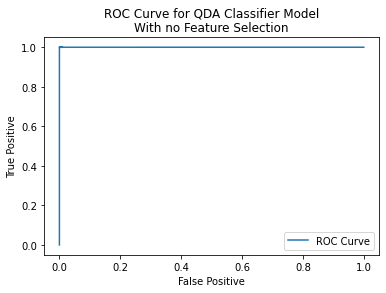

In [41]:
# Part h) ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

qda_roc = qda.predict_proba(x_test)

false_pos, true_pos, throwaway= roc_curve(y_test['x'].values.ravel(), qda_roc[:, 1])

plt.plot(false_pos, true_pos, label='ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title("ROC Curve for QDA Classifier Model\nWith no Feature Selection")
plt.legend()
plt.show()

In [42]:
quartile_one = dataset_filt.quantile(0.05)
quartile_three = dataset_filt.quantile(0.95)
innerquartilerange = quartile_three - quartile_one

dataset_iqr = dataset_filt[~((dataset_filt < (quartile_one - 1.5 * innerquartilerange)) |(dataset_filt > (quartile_three + 1.5 * innerquartilerange))).any(axis=1)]
dataset_L_iqr = dataset_L_filt[~((dataset_filt < (quartile_one - 1.5 * innerquartilerange)) |(dataset_filt > (quartile_three + 1.5 * innerquartilerange))).any(axis=1)]

feature_select = [12, 13, 27, 28, 63, 56, 77, 88, 108, 101]

x=dataset_iqr.iloc[:,feature_select]
x1=dataset_iqr
y=dataset_L_iqr.drop('Unnamed: 0', axis=1)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=4)

qda = QuadraticDiscriminantAnalysis()
qda_training = qda.fit(x_train,(y_train['x']==1)).predict(x_train)
qda_testing = qda.fit(x_test,(y_test['x']==1)).predict(x_test)


print("\nTRAINING DATA:")
print(classification_report((y_train['x']==1), qda_training, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score((y_train['x']==1), qda_training))

print("\nTEST DATA:")
print(classification_report((y_test['x']==1), qda_testing, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score((y_test['x']==1), qda_testing))

C:\Users\nickn\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\nickn\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



TRAINING DATA:
              precision    recall  f1-score   support

not malicous       1.00      0.01      0.02    683485
    malicous       0.50      1.00      0.66    669301

    accuracy                           0.50   1352786
   macro avg       0.75      0.51      0.34   1352786
weighted avg       0.75      0.50      0.34   1352786

0.5004701408796366

TEST DATA:
              precision    recall  f1-score   support

not malicous       1.00      0.06      0.12    335616
    malicous       0.51      1.00      0.68    330683

    accuracy                           0.53    666299
   macro avg       0.76      0.53      0.40    666299
weighted avg       0.76      0.53      0.40    666299

0.5283603907555017


In [43]:
print("FOR MODEL WITH SELECT K BEST FEATURE SELECTION")
print("Training MSE = ", mse(qda_training,y_train['x'].values))
print("Testing MSE = ", mse(qda_testing,y_test['x'].values))

FOR MODEL WITH SELECT K BEST FEATURE SELECTION
Training MSE =  0.49952985912036346
Testing MSE =  0.4716396092444983
